In [56]:
# DataFrame
import pandas as pd

# Seaborn
import seaborn as sns

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error


# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import spacy

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
from collections import Counter
import time

In [2]:
#Importing Datasets
song_data = pd.read_csv('song_datas.csv')
lyric_data = pd.read_csv('lyrics-data.csv')
song_data

,name,release_date,total_tracks,artists,id,name.1,duration_ms,explicit,id.1,name.2,...,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,time_signature
0,...Ready For It?,2017-09-03,1.0,NaN,06HL4z0CvFAxyc27GXpf02,Taylor Swift,208198.0,False,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,...,0.0665,0.000000,0.1550,0.453,160.000,audio_features,spotify:track:7zgqtptZvhf8GEmdsM2vp2,https://api.spotify.com/v1/tracks/7zgqtptZvhf8...,https://api.spotify.com/v1/audio-analysis/7zgq...,4.0
1,Life Changes,2017-09-08,14.0,NaN,6x2LnllRG5uGarZMsD4iO8,Thomas Rhett,190227.0,False,4Vxu50qVrQcycjRyJQaZLC,Life Changes,...,0.1000,0.000000,0.0452,0.809,87.972,audio_features,spotify:track:4Vxu50qVrQcycjRyJQaZLC,https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...,https://api.spotify.com/v1/audio-analysis/4Vxu...,4.0
2,24K Magic,2016-11-17,9.0,NaN,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,225983.0,False,6b8Be6ljOzmkOmFslEb23P,24K Magic,...,0.0340,0.000000,0.1530,0.632,106.970,audio_features,spotify:track:6b8Be6ljOzmkOmFslEb23P,https://api.spotify.com/v1/tracks/6b8Be6ljOzmk...,https://api.spotify.com/v1/audio-analysis/6b8B...,4.0
3,÷ (Deluxe),2017-03-03,16.0,NaN,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,170827.0,False,0afhq8XCExXpqazXczTSve,Galway Girl,...,0.0735,0.000000,0.3270,0.781,99.943,audio_features,spotify:track:0afhq8XCExXpqazXczTSve,https://api.spotify.com/v1/tracks/0afhq8XCExXp...,https://api.spotify.com/v1/audio-analysis/0afh...,4.0
4,x (Deluxe Edition),2014-06-21,16.0,NaN,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,258987.0,False,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,...,0.6070,0.000464,0.0986,0.201,107.989,audio_features,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10874,NaN,NaN,NaN,NaN,4xRYI6VqpkE3UwrDrAZL8L,Logic,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10875,NaN,NaN,NaN,NaN,6jsjhAEteAlY0vCiLvMLBA,ROZES,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10876,Tha Carter V,2018-09-28,23.0,NaN,55Aa2cqylxrFIXC767Z865,Lil Wayne,249450.0,True,5BQrp63SHCVf4bzCzJePne,Don't Cry (feat. XXXTENTACION),...,0.4070,0.000000,0.1830,0.233,112.014,audio_features,spotify:track:5BQrp63SHCVf4bzCzJePne,https://api.spotify.com/v1/tracks/5BQrp63SHCVf...,https://api.spotify.com/v1/audio-analysis/5BQr...,4.0
10877,NaN,NaN,NaN,NaN,15UsOTVnJzReFVN1VCnxy4,XXXTENTACION,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
lyric_data

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...
379926,/clegg-johnny/,The Waiting,/clegg-johnny/the-waiting.html,Chorus\nHere we stand waiting on the plain\nDa...,en
379927,/clegg-johnny/,Too Early For The Sky,/clegg-johnny/too-early-for-the-sky.html,I nearly disappeared into the mouth of a croco...,en
379928,/clegg-johnny/,Warsaw 1943 (I Never Betrayed The Revolution),/clegg-johnny/warsaw-1943-i-never-betrayed-the...,"Amambuka, amambuka azothengisa izwe lakithi, i...",en
379929,/clegg-johnny/,When The System Has Fallen,/clegg-johnny/when-the-system-has-fallen.html,Sweat in the heat for days on end\nwaiting for...,en


In [4]:
song_data.info()
print('\nColumns in song_data:',song_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10879 entries, 0 to 10878
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8958 non-null   object 
 1   release_date      8958 non-null   object 
 2   total_tracks      8958 non-null   float64
 3   artists           0 non-null      float64
 4   id                10879 non-null  object 
 5   name.1            10879 non-null  object 
 6   duration_ms       8958 non-null   float64
 7   explicit          8958 non-null   object 
 8   id.1              8958 non-null   object 
 9   name.2            8958 non-null   object 
 10  popularity        8958 non-null   float64
 11  danceability      8958 non-null   float64
 12  energy            8958 non-null   float64
 13  key               8958 non-null   float64
 14  loudness          8958 non-null   float64
 15  mode              8958 non-null   float64
 16  speechiness       8958 non-null   float6

In [5]:
lyric_data.info()
print('\nColumns in lyric_data:',lyric_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379931 entries, 0 to 379930
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ALink     379930 non-null  object
 1   SName     379928 non-null  object
 2   SLink     379930 non-null  object
 3   Lyric     379854 non-null  object
 4   language  365296 non-null  object
dtypes: object(5)
memory usage: 14.5+ MB

Columns in lyric_data: Index(['ALink', 'SName', 'SLink', 'Lyric', 'language'], dtype='object')


In [6]:
# Dropping uneccessary columns 
lyric_data = lyric_data.drop(['SLink'], axis = 1)

song_data = song_data.drop(['type', 'uri', 'track_href', 'analysis_url', 'artists', 'id'], axis = 1)

# Dropping rows with popularity = 0 as they are not accurate

song_data = song_data[song_data.popularity != 0]

lyric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379931 entries, 0 to 379930
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ALink     379930 non-null  object
 1   SName     379928 non-null  object
 2   Lyric     379854 non-null  object
 3   language  365296 non-null  object
dtypes: object(4)
memory usage: 11.6+ MB


In [7]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8095 entries, 1 to 10877
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              6174 non-null   object 
 1   release_date      6174 non-null   object 
 2   total_tracks      6174 non-null   float64
 3   name.1            8095 non-null   object 
 4   duration_ms       6174 non-null   float64
 5   explicit          6174 non-null   object 
 6   id.1              6174 non-null   object 
 7   name.2            6174 non-null   object 
 8   popularity        6174 non-null   float64
 9   danceability      6174 non-null   float64
 10  energy            6174 non-null   float64
 11  key               6174 non-null   float64
 12  loudness          6174 non-null   float64
 13  mode              6174 non-null   float64
 14  speechiness       6174 non-null   float64
 15  acousticness      6174 non-null   float64
 16  instrumentalness  6174 non-null   float64

In [8]:
#Looking for null values in datasets
print('song_data:')
print(song_data.isnull().sum())
print('\n')
print('lyric_data:')
print(lyric_data.isnull().sum())

song_data:
name                1921
release_date        1921
total_tracks        1921
name.1                 0
duration_ms         1921
explicit            1921
id.1                1921
name.2              1921
popularity          1921
danceability        1921
energy              1921
key                 1921
loudness            1921
mode                1921
speechiness         1921
acousticness        1921
instrumentalness    1921
liveness            1921
valence             1921
tempo               1921
time_signature      1921
dtype: int64


lyric_data:
ALink           1
SName           3
Lyric          77
language    14635
dtype: int64


In [9]:
#Dropping NULL Values
song_data = song_data.dropna()
print(song_data.count())

name                6174
release_date        6174
total_tracks        6174
name.1              6174
duration_ms         6174
explicit            6174
id.1                6174
name.2              6174
popularity          6174
danceability        6174
energy              6174
key                 6174
loudness            6174
mode                6174
speechiness         6174
acousticness        6174
instrumentalness    6174
liveness            6174
valence             6174
tempo               6174
time_signature      6174
dtype: int64


In [10]:
#Dropping NULL Values
lyric_data = lyric_data.dropna()
print(lyric_data.count())

ALink       365294
SName       365294
Lyric       365294
language    365294
dtype: int64


In [11]:
#Looking for duplicates in each dataset
duplicate_rows_df = song_data[song_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (9, 21)


In [12]:
#Looking for duplicates in each dataset
duplicate_rows_df = lyric_data[lyric_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (3, 4)


In [13]:
#Dropping the duplicates
song_data = song_data.drop_duplicates()
print('song_data after removing duplicates:')
print(song_data.count())

song_data after removing duplicates:
name                6165
release_date        6165
total_tracks        6165
name.1              6165
duration_ms         6165
explicit            6165
id.1                6165
name.2              6165
popularity          6165
danceability        6165
energy              6165
key                 6165
loudness            6165
mode                6165
speechiness         6165
acousticness        6165
instrumentalness    6165
liveness            6165
valence             6165
tempo               6165
time_signature      6165
dtype: int64


In [14]:
#Dropping the duplicates
lyric_data = lyric_data.drop_duplicates()
print('lyric_data after removing duplicates:')
print(lyric_data.count())

lyric_data after removing duplicates:
ALink       365291
SName       365291
Lyric       365291
language    365291
dtype: int64


In [15]:
#Changing artist name in lyric data to match format in song_data
lyric_data['ALink'] = lyric_data['ALink'].str.replace('-',' ')
lyric_data['ALink'] = lyric_data['ALink'].str.replace('/','')
lyric_data

,ALink,SName,Lyric,language
0,ivete sangalo,Arerê,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,ivete sangalo,Se Eu Não Te Amasse Tanto Assim,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,ivete sangalo,Céu da Boca,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,ivete sangalo,Quando A Chuva Passar,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,ivete sangalo,Sorte Grande,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...
379926,clegg johnny,The Waiting,Chorus\nHere we stand waiting on the plain\nDa...,en
379927,clegg johnny,Too Early For The Sky,I nearly disappeared into the mouth of a croco...,en
379928,clegg johnny,Warsaw 1943 (I Never Betrayed The Revolution),"Amambuka, amambuka azothengisa izwe lakithi, i...",en
379929,clegg johnny,When The System Has Fallen,Sweat in the heat for days on end\nwaiting for...,en


In [16]:
# Creating a temp df for song_data do that the song_name and artist_name match
temp_song = song_data
temp_song['name.1'] = temp_song['name.1'].str.lower()
temp_song.head(5)

,name,release_date,total_tracks,name.1,duration_ms,explicit,id.1,name.2,popularity,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1,Life Changes,2017-09-08,14.0,thomas rhett,190227.0,False,4Vxu50qVrQcycjRyJQaZLC,Life Changes,67.0,0.687,...,7.0,-4.370,1.0,0.0576,0.1000,0.000000,0.0452,0.809,87.972,4.0
2,24K Magic,2016-11-17,9.0,bruno mars,225983.0,False,6b8Be6ljOzmkOmFslEb23P,24K Magic,83.0,0.818,...,1.0,-4.282,1.0,0.0797,0.0340,0.000000,0.1530,0.632,106.970,4.0
3,÷ (Deluxe),2017-03-03,16.0,ed sheeran,170827.0,False,0afhq8XCExXpqazXczTSve,Galway Girl,82.0,0.624,...,9.0,-3.374,1.0,0.1000,0.0735,0.000000,0.3270,0.781,99.943,4.0
4,x (Deluxe Edition),2014-06-21,16.0,ed sheeran,258987.0,False,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,88.0,0.614,...,4.0,-10.480,1.0,0.0476,0.6070,0.000464,0.0986,0.201,107.989,4.0
5,Havana (feat. Young Thug),2017-08-03,1.0,camila cabello,216897.0,False,0ofbQMrRDsUaVKq2mGLEAb,Havana (feat. Young Thug),2.0,0.768,...,7.0,-4.323,0.0,0.0312,0.1860,0.000038,0.1040,0.418,104.992,4.0


## Merging the datasets

In [17]:
#Using the Song id as the key for merging the datasets

data = temp_song.merge(lyric_data, left_on = ['name.2','name.1'], right_on = ['SName','ALink'],how='inner').drop(['SName','ALink'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781 entries, 0 to 1780
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1781 non-null   object 
 1   release_date      1781 non-null   object 
 2   total_tracks      1781 non-null   float64
 3   name.1            1781 non-null   object 
 4   duration_ms       1781 non-null   float64
 5   explicit          1781 non-null   object 
 6   id.1              1781 non-null   object 
 7   name.2            1781 non-null   object 
 8   popularity        1781 non-null   float64
 9   danceability      1781 non-null   float64
 10  energy            1781 non-null   float64
 11  key               1781 non-null   float64
 12  loudness          1781 non-null   float64
 13  mode              1781 non-null   float64
 14  speechiness       1781 non-null   float64
 15  acousticness      1781 non-null   float64
 16  instrumentalness  1781 non-null   float64


In [18]:
data

,name,release_date,total_tracks,name.1,duration_ms,explicit,id.1,name.2,popularity,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Lyric,language
0,÷ (Deluxe),2017-03-03,16.0,ed sheeran,170827.0,False,0afhq8XCExXpqazXczTSve,Galway Girl,82.0,0.624,...,1.0,0.1000,0.07350,0.000000,0.3270,0.781,99.943,4.0,She played the fiddle in an Irish band\nBut sh...,en
1,x (Deluxe Edition),2014-06-21,16.0,ed sheeran,258987.0,False,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,88.0,0.614,...,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,4.0,Loving can hurt\nLoving can hurt sometimes\nBu...,en
2,x (Wembley Edition),2013,24.0,ed sheeran,258987.0,False,6fxVffaTuwjgEk5h9QyRjy,Photograph,69.0,0.614,...,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,4.0,Loving can hurt\nLoving can hurt sometimes\nBu...,en
3,Havana (feat. Young Thug),2017-08-03,1.0,camila cabello,216897.0,False,0ofbQMrRDsUaVKq2mGLEAb,Havana (feat. Young Thug),2.0,0.768,...,0.0,0.0312,0.18600,0.000038,0.1040,0.418,104.992,4.0,"Hey\nHavana, ooh na-na (ay)\nHalf of my heart ...",en
4,Camila,2018-01-12,11.0,camila cabello,217307.0,False,1rfofaqEpACxVEHIZBJe6W,Havana (feat. Young Thug),85.0,0.765,...,1.0,0.0300,0.18400,0.000036,0.1320,0.394,104.988,4.0,"Hey\nHavana, ooh na-na (ay)\nHalf of my heart ...",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,The Pains Of Growing,2018-11-30,15.0,alessia cara,208680.0,False,6qVwzCWDC6Kiatl7v2it7D,7 Days,47.0,0.503,...,0.0,0.1880,0.21400,0.000000,0.1650,0.798,79.157,4.0,If there's a God\nDo you think he's looking do...,en
1777,MAP OF THE SOUL : PERSONA,2019-04-12,7.0,bts,249215.0,False,6JdS5rJvJaRA7B1tcm7kxZ,Dionysus,36.0,0.502,...,1.0,0.1070,0.04000,0.000000,0.3190,0.588,176.084,4.0,Jjuk deurikyeo\nsuljan sippin' paljjang tippin...,en
1778,You Never Walk Alone,2017-02-13,18.0,bts,231860.0,False,4hrpoqJMVE7FxBu1YWx0eQ,Not Today,33.0,0.594,...,1.0,0.1260,0.00181,0.000001,0.9230,0.665,110.024,4.0,All the underdogs in the world\nA day may come...,en
1779,The Most Beautiful Moment in Life: Young Forever,2016-05-02,23.0,bts,210577.0,False,7dlNGfd6Fq8xcFb4K6Glws,I Need U,35.0,0.475,...,0.0,0.0736,0.01840,0.000000,0.2960,0.642,78.918,4.0,Fall (everything)\nFall (everything)\nFall (ev...,en


In [19]:
data.info()
print('\nColumns in data:',data.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781 entries, 0 to 1780
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1781 non-null   object 
 1   release_date      1781 non-null   object 
 2   total_tracks      1781 non-null   float64
 3   name.1            1781 non-null   object 
 4   duration_ms       1781 non-null   float64
 5   explicit          1781 non-null   object 
 6   id.1              1781 non-null   object 
 7   name.2            1781 non-null   object 
 8   popularity        1781 non-null   float64
 9   danceability      1781 non-null   float64
 10  energy            1781 non-null   float64
 11  key               1781 non-null   float64
 12  loudness          1781 non-null   float64
 13  mode              1781 non-null   float64
 14  speechiness       1781 non-null   float64
 15  acousticness      1781 non-null   float64
 16  instrumentalness  1781 non-null   float64


In [20]:
#Renaming Columns for better readabilty

data = data.rename(columns={"name": "album_name", "name.1": "artist_name", "name.2": "song_name", "id.1": "id", "Lyric" : "lyrics"})
data

,album_name,release_date,total_tracks,artist_name,duration_ms,explicit,id,song_name,popularity,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lyrics,language
0,÷ (Deluxe),2017-03-03,16.0,ed sheeran,170827.0,False,0afhq8XCExXpqazXczTSve,Galway Girl,82.0,0.624,...,1.0,0.1000,0.07350,0.000000,0.3270,0.781,99.943,4.0,She played the fiddle in an Irish band\nBut sh...,en
1,x (Deluxe Edition),2014-06-21,16.0,ed sheeran,258987.0,False,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,88.0,0.614,...,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,4.0,Loving can hurt\nLoving can hurt sometimes\nBu...,en
2,x (Wembley Edition),2013,24.0,ed sheeran,258987.0,False,6fxVffaTuwjgEk5h9QyRjy,Photograph,69.0,0.614,...,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,4.0,Loving can hurt\nLoving can hurt sometimes\nBu...,en
3,Havana (feat. Young Thug),2017-08-03,1.0,camila cabello,216897.0,False,0ofbQMrRDsUaVKq2mGLEAb,Havana (feat. Young Thug),2.0,0.768,...,0.0,0.0312,0.18600,0.000038,0.1040,0.418,104.992,4.0,"Hey\nHavana, ooh na-na (ay)\nHalf of my heart ...",en
4,Camila,2018-01-12,11.0,camila cabello,217307.0,False,1rfofaqEpACxVEHIZBJe6W,Havana (feat. Young Thug),85.0,0.765,...,1.0,0.0300,0.18400,0.000036,0.1320,0.394,104.988,4.0,"Hey\nHavana, ooh na-na (ay)\nHalf of my heart ...",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,The Pains Of Growing,2018-11-30,15.0,alessia cara,208680.0,False,6qVwzCWDC6Kiatl7v2it7D,7 Days,47.0,0.503,...,0.0,0.1880,0.21400,0.000000,0.1650,0.798,79.157,4.0,If there's a God\nDo you think he's looking do...,en
1777,MAP OF THE SOUL : PERSONA,2019-04-12,7.0,bts,249215.0,False,6JdS5rJvJaRA7B1tcm7kxZ,Dionysus,36.0,0.502,...,1.0,0.1070,0.04000,0.000000,0.3190,0.588,176.084,4.0,Jjuk deurikyeo\nsuljan sippin' paljjang tippin...,en
1778,You Never Walk Alone,2017-02-13,18.0,bts,231860.0,False,4hrpoqJMVE7FxBu1YWx0eQ,Not Today,33.0,0.594,...,1.0,0.1260,0.00181,0.000001,0.9230,0.665,110.024,4.0,All the underdogs in the world\nA day may come...,en
1779,The Most Beautiful Moment in Life: Young Forever,2016-05-02,23.0,bts,210577.0,False,7dlNGfd6Fq8xcFb4K6Glws,I Need U,35.0,0.475,...,0.0,0.0736,0.01840,0.000000,0.2960,0.642,78.918,4.0,Fall (everything)\nFall (everything)\nFall (ev...,en


## Basic EDA

In [21]:
#making a new dataset with only numerical data
comp_data = data.select_dtypes(include=['float64','int64'])
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781 entries, 0 to 1780
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_tracks      1781 non-null   float64
 1   duration_ms       1781 non-null   float64
 2   popularity        1781 non-null   float64
 3   danceability      1781 non-null   float64
 4   energy            1781 non-null   float64
 5   key               1781 non-null   float64
 6   loudness          1781 non-null   float64
 7   mode              1781 non-null   float64
 8   speechiness       1781 non-null   float64
 9   acousticness      1781 non-null   float64
 10  instrumentalness  1781 non-null   float64
 11  liveness          1781 non-null   float64
 12  valence           1781 non-null   float64
 13  tempo             1781 non-null   float64
 14  time_signature    1781 non-null   float64
dtypes: float64(15)
memory usage: 222.6 KB


,total_tracks,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
total_tracks,1.000000,-0.009513,0.032163,0.029201,0.019216,-0.012132,-0.022773,0.035145,-0.009113,0.015222,-0.051008,0.025822,0.066894,0.027324,0.006620
duration_ms,-0.009513,1.000000,0.000238,-0.247772,-0.077208,-0.020349,-0.155205,-0.039056,-0.042808,-0.014538,0.142610,0.019850,-0.315609,-0.010754,-0.065692
popularity,0.032163,0.000238,1.000000,0.144900,-0.050597,-0.012736,0.018327,-0.024621,-0.008214,0.008117,-0.146487,-0.044018,0.091661,-0.045291,0.028158
danceability,0.029201,-0.247772,0.144900,1.000000,-0.117019,0.024910,-0.012178,-0.055018,0.080756,0.008488,-0.150895,-0.069556,0.496369,-0.237413,0.124995
energy,0.019216,-0.077208,-0.050597,-0.117019,1.000000,0.011563,0.735866,-0.077550,0.120350,-0.692561,0.029002,0.192243,0.257388,0.207648,0.147294
key,-0.012132,-0.020349,-0.012736,0.024910,0.011563,1.000000,0.008264,-0.135049,0.009611,-0.014492,-0.013966,0.018644,0.050766,0.010516,-0.045505
loudness,-0.022773,-0.155205,0.018327,-0.012178,0.735866,0.008264,1.000000,-0.033245,0.064995,-0.580197,-0.111317,0.106347,0.161458,0.128330,0.086298
mode,0.035145,-0.039056,-0.024621,-0.055018,-0.077550,-0.135049,-0.033245,1.000000,-0.109465,0.118220,-0.065907,-0.032607,-0.030726,-0.024941,-0.054339
speechiness,-0.009113,-0.042808,-0.008214,0.080756,0.120350,0.009611,0.064995,-0.109465,1.000000,-0.082474,-0.015174,0.159766,0.071494,0.023343,0.058567
acousticness,0.015222,-0.014538,0.008117,0.008488,-0.692561,-0.014492,-0.580197,0.118220,-0.082474,1.000000,-0.030240,-0.113742,-0.155866,-0.155560,-0.118314


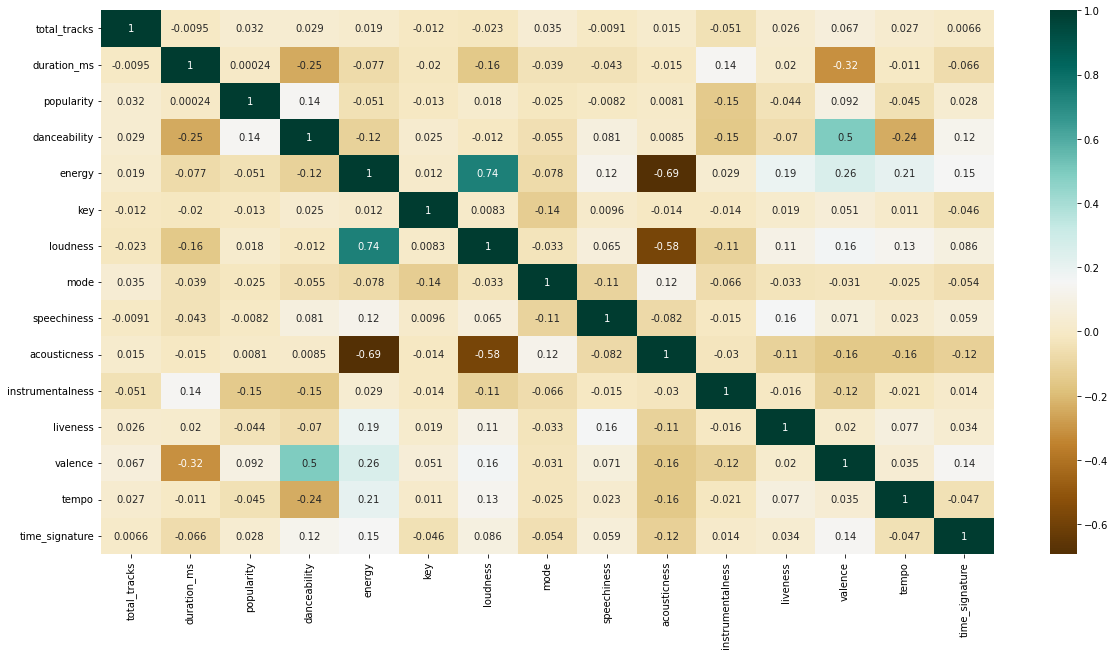

In [22]:
plt.figure(figsize=(20,10))
c = comp_data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

In [86]:
# Split into train and test dataset.
data_train, data_test = train_test_split(comp_data, test_size=0.2, random_state=42)
print("TRAIN size:", len(data_train))
print("TEST size:", len(data_test))

TRAIN size: 1424
TEST size: 357


In [87]:
x_train = data_train.drop(['popularity', 'time_signature'], axis = 1).values
x_train

array([[1.60000e+01, 2.35382e+05, 8.18000e-01, ..., 6.01000e-02,
        9.39000e-01, 1.19988e+02],
       [1.20000e+01, 2.67720e+05, 7.66000e-01, ..., 8.55000e-02,
        6.12000e-01, 1.29972e+02],
       [1.20000e+01, 2.61733e+05, 4.47000e-01, ..., 8.03000e-02,
        4.20000e-01, 9.54600e+01],
       ...,
       [1.00000e+01, 2.14733e+05, 5.50000e-01, ..., 3.66000e-01,
        7.77000e-01, 1.14512e+02],
       [1.00000e+00, 3.52865e+05, 1.90000e-01, ..., 1.41000e-01,
        5.17000e-02, 6.74930e+01],
       [1.00000e+01, 2.36213e+05, 3.59000e-01, ..., 3.79000e-01,
        5.82000e-01, 8.69510e+01]])

In [88]:
x_test = data_test.drop(['popularity', 'time_signature'], axis = 1).values
x_test

array([[1.30000e+01, 2.14525e+05, 4.31000e-01, ..., 8.89000e-02,
        2.91000e-01, 1.76856e+02],
       [1.80000e+01, 1.90987e+05, 5.60000e-01, ..., 6.43000e-02,
        9.61000e-01, 1.29984e+02],
       [1.20000e+01, 2.14227e+05, 6.60000e-01, ..., 2.68000e-02,
        9.33000e-01, 8.99750e+01],
       ...,
       [1.00000e+00, 2.08373e+05, 5.32000e-01, ..., 1.36000e-01,
        4.22000e-01, 1.59803e+02],
       [1.60000e+01, 2.31573e+05, 6.10000e-01, ..., 7.58000e-01,
        2.94000e-01, 1.27916e+02],
       [1.20000e+01, 2.55173e+05, 3.31000e-01, ..., 1.08000e-01,
        1.41000e-01, 1.57938e+02]])

In [89]:
y_train = data_train['popularity'].values
y_train

array([74., 75., 45., ..., 77., 52., 57.])

In [90]:
y_test = data_test['popularity'].values
y_test

array([63., 67., 76., 74., 64., 54., 43., 78., 62., 60., 63., 75., 51.,
       62., 41., 33., 70., 44., 52., 31., 49., 49., 71., 62., 67., 49.,
       47., 83., 75., 65.,  1., 81., 27., 68., 71., 64., 54., 66., 36.,
       54., 70., 84., 54., 79., 33., 68., 68., 69., 30., 62., 50., 72.,
       58., 71., 81., 44., 26., 62., 46., 61., 79., 52., 72., 66., 70.,
       79., 58., 60., 84., 66., 59., 13., 55., 51., 78., 74., 44.,  1.,
       50., 58., 78., 57., 42., 62., 71., 73., 69., 36., 61., 56.,  2.,
       46., 54., 77., 69., 71., 70., 85., 33., 55., 55., 61., 23., 76.,
       63., 61., 57., 26., 76., 54., 70., 53., 51.,  8., 65., 82., 62.,
       43., 38., 36.,  3., 66., 41., 89., 63., 70., 55., 63., 54., 74.,
       66., 44., 83., 57., 29., 71., 54., 47., 69., 70., 65., 77., 61.,
       61., 59., 69., 84., 72., 72., 82., 71., 85., 55., 88., 28., 75.,
       28., 81., 82., 35., 32.,  1., 88., 54., 54., 59., 47., 25., 59.,
       65., 61., 43., 43., 75., 65., 47., 61., 65., 31., 38., 54

In [91]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[0.16853933, 0.17755779, 0.81464531, ..., 0.04270811, 0.94669732,
        0.45542388],
       [0.12359551, 0.23438824, 0.75514874, ..., 0.0703108 , 0.60493311,
        0.52163648],
       [0.12359551, 0.22386675, 0.39016018, ..., 0.06465986, 0.40426421,
        0.29275733],
       ...,
       [0.1011236 , 0.14126947, 0.50800915, ..., 0.37513584, 0.77738294,
        0.41910775],
       [0.        , 0.38402112, 0.09610984, ..., 0.13062378, 0.01933528,
        0.10728378],
       [0.1011236 , 0.17901818, 0.28947368, ..., 0.3892632 , 0.5735786 ,
        0.23632674]])

In [102]:
model = Sequential()
  
model.add(Dense(43, activation='relu'))

model.add(Dense(30, activation='relu'))
  
model.add(Dense(20, activation='relu'))

model.add(Dense(10, activation='relu'))
  
model.add(Dense(3, activation='relu'))

model.add(Dense(1))
  
model.compile(optimizer='adam', loss='mse')

In [103]:
model.fit(x=x_train, y=y_train, epochs=400, 
          validation_data=(x_test,y_test))

Epoch 1/400
45/45 [==============================] - 1s 6ms/step - loss: 3769.6704 - val_loss: 3485.0049
Epoch 2/400
45/45 [==============================] - 0s 3ms/step - loss: 3273.5039 - val_loss: 2173.0088
Epoch 3/400
45/45 [==============================] - 0s 4ms/step - loss: 970.4647 - val_loss: 436.0489
Epoch 4/400
45/45 [==============================] - 0s 5ms/step - loss: 426.8831 - val_loss: 384.6797
Epoch 5/400
45/45 [==============================] - 0s 5ms/step - loss: 411.7601 - val_loss: 373.0860
Epoch 6/400
45/45 [==============================] - 0s 6ms/step - loss: 405.1927 - val_loss: 366.7282
Epoch 7/400
45/45 [==============================] - 0s 6ms/step - loss: 398.5060 - val_loss: 367.7425
Epoch 8/400
45/45 [==============================] - 0s 4ms/step - loss: 393.2993 - val_loss: 362.7068
Epoch 9/400
45/45 [==============================] - 0s 5ms/step - loss: 389.0103 - val_loss: 355.5881
Epoch 10/400
45/45 [==============================] - 0s 6ms/step - l

Epoch 80/400
45/45 [==============================] - 0s 3ms/step - loss: 344.5793 - val_loss: 333.7039
Epoch 81/400
45/45 [==============================] - 0s 3ms/step - loss: 343.6244 - val_loss: 342.8344
Epoch 82/400
45/45 [==============================] - 0s 3ms/step - loss: 346.0582 - val_loss: 331.8683
Epoch 83/400
45/45 [==============================] - 0s 3ms/step - loss: 346.0346 - val_loss: 340.9253
Epoch 84/400
45/45 [==============================] - 0s 3ms/step - loss: 344.1711 - val_loss: 331.9972
Epoch 85/400
45/45 [==============================] - 0s 3ms/step - loss: 346.8700 - val_loss: 336.6571
Epoch 86/400
45/45 [==============================] - 0s 3ms/step - loss: 344.2028 - val_loss: 340.1020
Epoch 87/400
45/45 [==============================] - 0s 3ms/step - loss: 343.2980 - val_loss: 333.4307
Epoch 88/400
45/45 [==============================] - 0s 3ms/step - loss: 342.3283 - val_loss: 346.2661
Epoch 89/400
45/45 [==============================] - 0s 3ms/ste

45/45 [==============================] - 0s 5ms/step - loss: 334.0394 - val_loss: 329.7718
Epoch 159/400
45/45 [==============================] - 0s 5ms/step - loss: 333.6423 - val_loss: 334.8172
Epoch 160/400
45/45 [==============================] - 0s 4ms/step - loss: 335.1269 - val_loss: 330.1523
Epoch 161/400
45/45 [==============================] - 0s 6ms/step - loss: 333.1172 - val_loss: 337.6170
Epoch 162/400
45/45 [==============================] - 0s 2ms/step - loss: 334.5287 - val_loss: 337.7728
Epoch 163/400
45/45 [==============================] - 0s 3ms/step - loss: 335.9996 - val_loss: 332.9983
Epoch 164/400
45/45 [==============================] - 0s 2ms/step - loss: 338.1088 - val_loss: 346.4331
Epoch 165/400
45/45 [==============================] - 0s 2ms/step - loss: 332.4759 - val_loss: 342.7546
Epoch 166/400
45/45 [==============================] - 0s 2ms/step - loss: 333.9301 - val_loss: 332.9035
Epoch 167/400
45/45 [==============================] - 0s 2ms/step - 

45/45 [==============================] - 0s 3ms/step - loss: 327.2501 - val_loss: 348.0427
Epoch 237/400
45/45 [==============================] - 0s 4ms/step - loss: 330.3492 - val_loss: 331.4702
Epoch 238/400
45/45 [==============================] - 0s 4ms/step - loss: 337.1463 - val_loss: 329.9916
Epoch 239/400
45/45 [==============================] - 0s 4ms/step - loss: 330.0055 - val_loss: 337.1961
Epoch 240/400
45/45 [==============================] - 0s 4ms/step - loss: 326.7533 - val_loss: 340.6381
Epoch 241/400
45/45 [==============================] - 0s 3ms/step - loss: 326.2357 - val_loss: 331.9502
Epoch 242/400
45/45 [==============================] - 0s 3ms/step - loss: 325.6729 - val_loss: 358.5926
Epoch 243/400
45/45 [==============================] - 0s 4ms/step - loss: 331.4448 - val_loss: 332.5004
Epoch 244/400
45/45 [==============================] - 0s 4ms/step - loss: 325.5616 - val_loss: 339.5957
Epoch 245/400
45/45 [==============================] - 0s 5ms/step - 

45/45 [==============================] - 0s 3ms/step - loss: 322.7824 - val_loss: 334.7937
Epoch 315/400
45/45 [==============================] - 0s 3ms/step - loss: 321.1568 - val_loss: 342.2096
Epoch 316/400
45/45 [==============================] - 0s 4ms/step - loss: 321.7245 - val_loss: 336.7399
Epoch 317/400
45/45 [==============================] - 0s 4ms/step - loss: 320.1049 - val_loss: 337.3623
Epoch 318/400
45/45 [==============================] - 0s 4ms/step - loss: 318.5183 - val_loss: 335.8224
Epoch 319/400
45/45 [==============================] - 0s 3ms/step - loss: 326.3049 - val_loss: 334.9397
Epoch 320/400
45/45 [==============================] - 0s 3ms/step - loss: 325.7527 - val_loss: 337.7854
Epoch 321/400
45/45 [==============================] - 0s 4ms/step - loss: 321.2498 - val_loss: 335.5470
Epoch 322/400
45/45 [==============================] - 0s 3ms/step - loss: 318.1239 - val_loss: 339.4641
Epoch 323/400
45/45 [==============================] - 0s 4ms/step - 

45/45 [==============================] - 0s 4ms/step - loss: 314.6285 - val_loss: 351.8405
Epoch 393/400
45/45 [==============================] - 0s 4ms/step - loss: 315.3252 - val_loss: 341.8460
Epoch 394/400
45/45 [==============================] - 0s 5ms/step - loss: 316.4755 - val_loss: 344.2126
Epoch 395/400
45/45 [==============================] - 0s 4ms/step - loss: 314.2579 - val_loss: 343.0038
Epoch 396/400
45/45 [==============================] - 0s 4ms/step - loss: 314.8685 - val_loss: 352.0994
Epoch 397/400
45/45 [==============================] - 0s 3ms/step - loss: 313.6272 - val_loss: 342.3866
Epoch 398/400
45/45 [==============================] - 0s 4ms/step - loss: 312.8622 - val_loss: 343.3063
Epoch 399/400
45/45 [==============================] - 0s 4ms/step - loss: 313.5779 - val_loss: 350.0770
Epoch 400/400
45/45 [==============================] - 0s 4ms/step - loss: 314.3495 - val_loss: 341.7066


<AxesSubplot:>

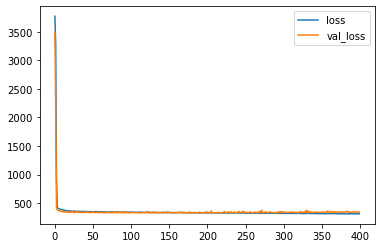

In [104]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [105]:
predictions = model.predict(x_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)

,Predict,Actual
0,61.125839,63.0
1,63.200207,67.0
2,58.564594,76.0
3,66.391235,74.0
4,61.245766,64.0
5,55.750431,54.0
6,62.823807,43.0
7,55.279846,78.0
8,55.249821,62.0
9,58.202732,60.0


In [106]:
mean_absolute_error(y_test,predictions)

14.364672898578377

In [107]:

np.sqrt(mean_squared_error(y_test,predictions))

18.485308304373234